# Prediction of iris flower with the help of support_vector_machine

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn.datasets import load_iris
iris = load_iris()

In [32]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [33]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [34]:
df = pd.DataFrame(iris.data,columns = iris.feature_names)

In [35]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [36]:
df.shape

(150, 4)

In [37]:
df["target"] = iris.target

In [38]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [41]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [17]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [22]:
df["target"].value_counts()

0    50
1    50
2    50
Name: target, dtype: int64

In [24]:
df.target = df.target.map({"setosa":0,"versicolor":1,"virginica":2})

In [42]:
df["flower_name"] = df["target"].astype(int).apply(lambda x:iris.target_names[x])

In [44]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [54]:
df0 = df[df["target"]==0]
df1 =df[df["target"]==1]
df2 = df[df["target"]==2]

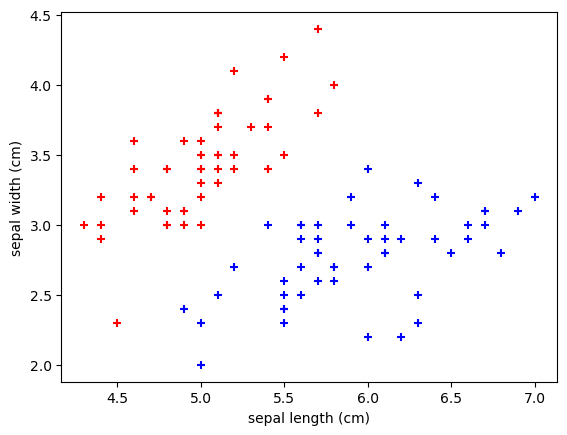

In [57]:
plt.xlabel("sepal length (cm)")
plt.ylabel("sepal width (cm)")
plt.scatter(df0["sepal length (cm)"], df0["sepal width (cm)"], color="red", marker="+")
plt.scatter(df1["sepal length (cm)"], df1["sepal width (cm)"], color="blue", marker="+") 

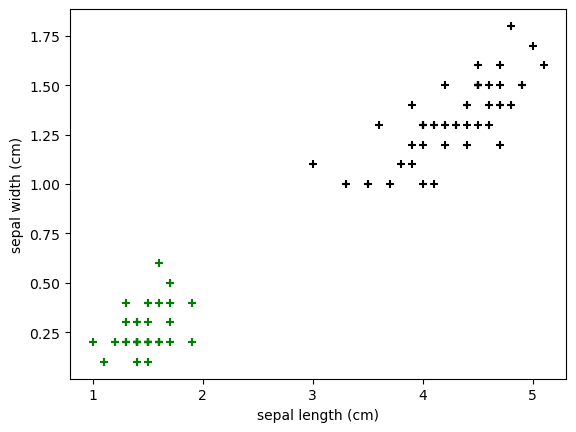

In [60]:
plt.xlabel("sepal length (cm)")
plt.ylabel("sepal width (cm)")
plt.scatter(df0["petal length (cm)"], df0["petal width (cm)"], color="green",marker="+")
plt.scatter(df1["petal length (cm)"],df1["petal width (cm)"],color="black",marker="+")

In [61]:
from sklearn.model_selection import train_test_split
x = df.drop(["target","flower_name"],axis = "columns")

In [62]:
x.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [63]:
y = df["target"]

In [64]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int32

In [65]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =0.2)

In [66]:
len(x_train)

120

In [67]:
len(x_test)

30

In [68]:
from sklearn.svm import SVC
model = SVC()
model.fit(x_train,y_train)

SVC()

In [69]:
model.score(x_test,y_test)

0.9333333333333333

In [70]:
model.predict([[5,3.6,1.4,.2]])

C:\Users\abc\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([0])

In [71]:
model.predict([[6.7,3.0,5.2,2.3]])

C:\Users\abc\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([2])